In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv('Temperature_And_Precipitation_Cities_IN/Lucknow_1990_2022.csv')

In [3]:
df.head(10)

,time,tavg,tmin,tmax,prcp
0,01-01-1990,7.2,NaN,18.1,0.0
1,02-01-1990,10.5,NaN,17.2,0.0
2,03-01-1990,10.2,1.8,18.6,NaN
3,04-01-1990,9.1,NaN,19.3,0.0
4,05-01-1990,13.5,NaN,23.8,0.0
5,06-01-1990,11.5,5.9,21.4,0.0
6,07-01-1990,14.2,5.4,23.6,0.0
7,08-01-1990,17.1,NaN,24.6,0.0
8,09-01-1990,11.1,NaN,24.6,0.0
9,10-01-1990,14.8,4.1,23.6,0.0


In [4]:
df.shape

(11894, 5)

In [5]:
df.dtypes

time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
dtype: object

In [6]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

In [7]:
df.head()

,time,tavg,tmin,tmax,prcp
0,1990-01-01,7.2,NaN,18.1,0.0
1,1990-01-02,10.5,NaN,17.2,0.0
2,1990-01-03,10.2,1.8,18.6,NaN
3,1990-01-04,9.1,NaN,19.3,0.0
4,1990-01-05,13.5,NaN,23.8,0.0


In [8]:
df.isnull().sum()

time       0
tavg     138
tmin    3515
tmax    1553
prcp    6152
dtype: int64

In [9]:
# 1. Calculate and fill missing 'tavg' values
# Formula: tavg = (tmin + tmax) / 2
df['tavg'].fillna((df['tmin'] + df['tmax']) / 2, inplace=True)

In [10]:
# 2. Calculate and fill missing 'tmax' values
# Formula: tmax = (2 * tavg) - tmin
df['tmax'].fillna((2 * df['tavg']) - df['tmin'], inplace=True)

In [11]:
# 3. Calculate and fill missing 'tmin' values
# Formula: tmin = (2 * tavg) - tmax
df['tmin'].fillna((2 * df['tavg']) - df['tmax'], inplace=True)

In [12]:
df=df.round(1)

In [13]:
df.head()

,time,tavg,tmin,tmax,prcp
0,1990-01-01,7.2,-3.7,18.1,0.0
1,1990-01-02,10.5,3.8,17.2,0.0
2,1990-01-03,10.2,1.8,18.6,NaN
3,1990-01-04,9.1,-1.1,19.3,0.0
4,1990-01-05,13.5,3.2,23.8,0.0


In [14]:
df.isnull().sum()

time       0
tavg     138
tmin     529
tmax     529
prcp    6152
dtype: int64

By adding .copy(), you are making df_cleaned a separate object. Now, when you run your fillna command, pandas knows exactly which DataFrame to modify and will not show the warning.

In [15]:
# Drops rows if a value is missing in 'tmin' OR 'prcp'
# df_cleaned = df.dropna(subset=['tmin', 'prcp'])

# Drops a row only if 'tmin' AND 'tmax' AND 'prcp' are missing
df_cleaned = df.dropna(subset=['tmin', 'tmax'], how='all').copy()
df_cleaned = df.dropna(subset=['tmin', 'tavg'], how='all').copy()
df_cleaned = df.dropna(subset=['tavg', 'tmax'], how='all').copy()

In [16]:
df_cleaned.head()

,time,tavg,tmin,tmax,prcp
0,1990-01-01,7.2,-3.7,18.1,0.0
1,1990-01-02,10.5,3.8,17.2,0.0
2,1990-01-03,10.2,1.8,18.6,NaN
3,1990-01-04,9.1,-1.1,19.3,0.0
4,1990-01-05,13.5,3.2,23.8,0.0


In [17]:
df_cleaned.shape

(11756, 5)

In [18]:
df_cleaned['prcp'].describe()

count    5742.000000
mean        4.535650
std        17.079051
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       470.900000
Name: prcp, dtype: float64

In [19]:
# Fill missing precipitation data with 0
df_cleaned['prcp'].fillna(0, inplace=True)

np.log1p(...): This is the key transformation step. It applies a natural logarithm in the data, which is highly effective for right-skewed distributions like rainfall data.

It compresses the very large values (like max of 361.2).

It expands the smaller values.

The result is a distribution that is much more symmetrical and bell-shaped, which is ideal for many statistical analyses and machine learning models.

In [20]:
# Create a new, log-transformed column.
# We use np.log1p which calculates log(1+x) to handle the zero values correctly.
df_cleaned['prcp_log'] = np.log1p(df_cleaned['prcp'])

In [21]:
df_cleaned.head(10)

,time,tavg,tmin,tmax,prcp,prcp_log
0,1990-01-01,7.2,-3.7,18.1,0.0,0.0
1,1990-01-02,10.5,3.8,17.2,0.0,0.0
2,1990-01-03,10.2,1.8,18.6,0.0,0.0
3,1990-01-04,9.1,-1.1,19.3,0.0,0.0
4,1990-01-05,13.5,3.2,23.8,0.0,0.0
5,1990-01-06,11.5,5.9,21.4,0.0,0.0
6,1990-01-07,14.2,5.4,23.6,0.0,0.0
7,1990-01-08,17.1,9.6,24.6,0.0,0.0
8,1990-01-09,11.1,-2.4,24.6,0.0,0.0
9,1990-01-10,14.8,4.1,23.6,0.0,0.0


In [22]:
df_cleaned.isnull().sum()

time          0
tavg          0
tmin        391
tmax        391
prcp          0
prcp_log      0
dtype: int64

In [23]:
# Calculate the daily temperature range
df_cleaned['temp_range'] = df_cleaned['tmax'] - df_cleaned['tmin']

In [24]:
# What was the average temperature yesterday?
df_cleaned['tavg_lag_1'] = df_cleaned['tavg'].shift(1)

# What was the average temperature over the last week?
df_cleaned['tavg_rolling_7d_mean'] = df_cleaned['tavg'].rolling(window=7).mean()

# What was the total rainfall in the last 14 days?
df_cleaned['prcp_rolling_14d_sum'] = df_cleaned['prcp'].rolling(window=14).sum()

In [25]:
df_cleaned['month'] = df_cleaned['time'].dt.month
df_cleaned['day_of_year'] = df_cleaned['time'].dt.dayofyear
df_cleaned['day_of_week'] = df_cleaned['time'].dt.dayofweek # Monday=0, Sunday=6
df_cleaned['year'] = df_cleaned['time'].dt.year

In [26]:
df_cleaned.head(10)

,time,tavg,tmin,tmax,prcp,prcp_log,temp_range,tavg_lag_1,month,day_of_year,day_of_week,year
0,1990-01-01,7.2,-3.7,18.1,0.0,0.0,21.8,NaN,1,1,0,1990
1,1990-01-02,10.5,3.8,17.2,0.0,0.0,13.4,7.2,1,2,1,1990
2,1990-01-03,10.2,1.8,18.6,0.0,0.0,16.8,10.5,1,3,2,1990
3,1990-01-04,9.1,-1.1,19.3,0.0,0.0,20.4,10.2,1,4,3,1990
4,1990-01-05,13.5,3.2,23.8,0.0,0.0,20.6,9.1,1,5,4,1990
5,1990-01-06,11.5,5.9,21.4,0.0,0.0,15.5,13.5,1,6,5,1990
6,1990-01-07,14.2,5.4,23.6,0.0,0.0,18.2,11.5,1,7,6,1990
7,1990-01-08,17.1,9.6,24.6,0.0,0.0,15.0,14.2,1,8,0,1990
8,1990-01-09,11.1,-2.4,24.6,0.0,0.0,27.0,17.1,1,9,1,1990
9,1990-01-10,14.8,4.1,23.6,0.0,0.0,19.5,11.1,1,10,2,1990


In [27]:
df_cleaned.tail(10)

,time,tavg,tmin,tmax,prcp,prcp_log,temp_range,tavg_lag_1,month,day_of_year,day_of_week,year
11884,2022-07-16,31.1,26.1,36.1,11.0,2.484907,10.0,32.9,7,197,5,2022
11885,2022-07-17,33.4,30.1,37.1,0.3,0.262364,7.0,31.1,7,198,6,2022
11886,2022-07-18,33.5,31.1,36.1,0.6,0.470004,5.0,33.4,7,199,0,2022
11887,2022-07-19,33.4,30.1,37.1,0.3,0.262364,7.0,33.5,7,200,1,2022
11888,2022-07-20,28.6,25.1,33.1,17.7,2.928524,8.0,33.4,7,201,2,2022
11889,2022-07-21,27.4,25.1,33.1,27.3,3.342862,8.0,28.6,7,202,3,2022
11890,2022-07-22,28.1,26.1,31.1,16.0,2.833213,5.0,27.4,7,203,4,2022
11891,2022-07-23,30.3,26.2,34.7,11.9,2.557227,8.5,28.1,7,204,5,2022
11892,2022-07-24,30.0,28.1,34.7,2.0,1.098612,6.6,30.3,7,205,6,2022
11893,2022-07-25,27.1,24.1,34.3,0.5,0.405465,10.2,30.0,7,206,0,2022


In [28]:
df_cleaned.dtypes

time           datetime64[ns]
tavg                  float64
tmin                  float64
tmax                  float64
prcp                  float64
prcp_log              float64
temp_range            float64
tavg_lag_1            float64
month                   int32
day_of_year             int32
day_of_week             int32
year                    int32
dtype: object

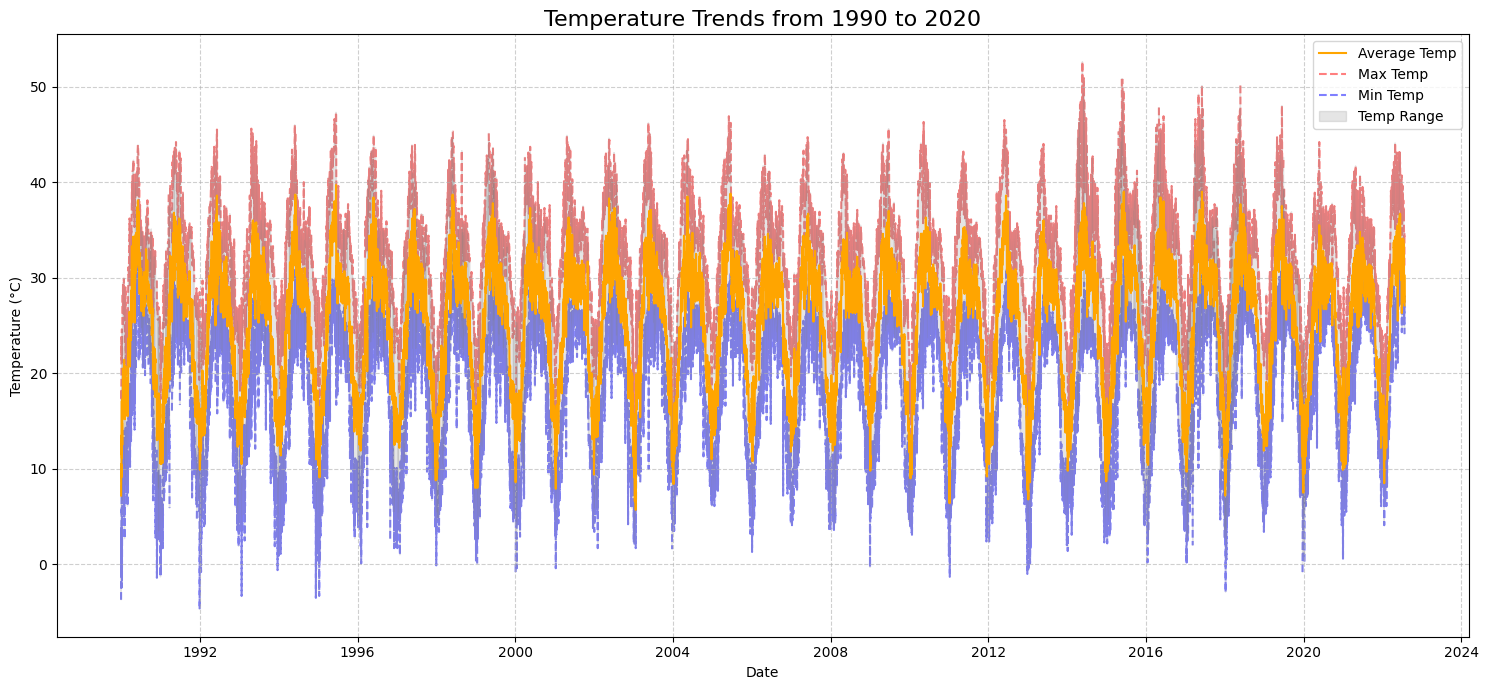

In [29]:
plt.figure(figsize=(15, 7))
plt.plot(df_cleaned['time'], df_cleaned['tavg'], label='Average Temp', color='orange', zorder=2)
plt.plot(df_cleaned['time'], df_cleaned['tmax'], label='Max Temp', color='red', linestyle='--', alpha=0.5, zorder=1)
plt.plot(df_cleaned['time'], df_cleaned['tmin'], label='Min Temp', color='blue', linestyle='--', alpha=0.5, zorder=1)
plt.fill_between(df_cleaned['time'], df_cleaned['tmin'], df_cleaned['tmax'], color='gray', alpha=0.2, label='Temp Range')

plt.title('Temperature Trends from 1990 to 2020', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [30]:
df_cleaned.dtypes

time           datetime64[ns]
tavg                  float64
tmin                  float64
tmax                  float64
prcp                  float64
prcp_log              float64
temp_range            float64
tavg_lag_1            float64
month                   int32
day_of_year             int32
day_of_week             int32
year                    int32
dtype: object

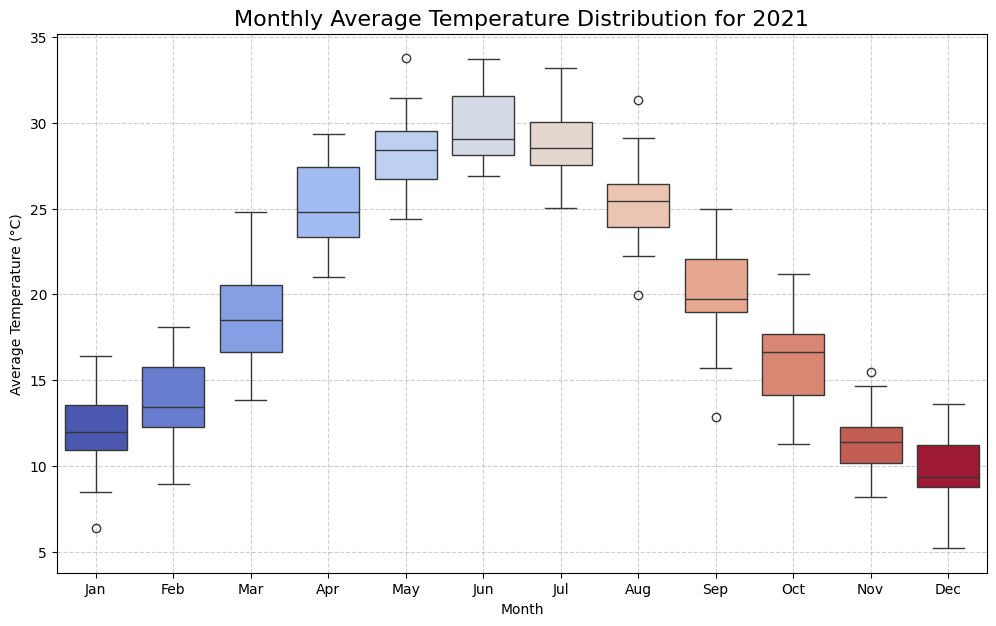

In [31]:
np.random.seed(0)
dates = pd.to_datetime(pd.date_range(start='2021-01-01', end='2021-12-31', freq='D'))
df_cleaned2 = pd.DataFrame({
    'year': dates.year,
    'month': dates.month,
    'tavg': 20 + 10 * np.sin(2 * np.pi * (dates.dayofyear - 80) / 365.25) + np.random.normal(0, 2, len(dates))
}).copy()


df_plot = df_cleaned2[df_cleaned2['year'] == 2021].copy()

plt.figure(figsize=(12, 7))

# Corrected line: 'month' is now assigned to 'hue'
sns.boxplot(x='month', y='tavg', data=df_plot, palette='coolwarm', hue='month')

# This line removes the unnecessary legend that seaborn creates when x and hue are the same.
plt.legend([],[], frameon=False)

plt.title('Monthly Average Temperature Distribution for 2021', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('monthly_avg_temp_boxplot.png') # Saving the plot
plt.show() # Displaying the plot

In [32]:
df_cleaned.dtypes

time           datetime64[ns]
tavg                  float64
tmin                  float64
tmax                  float64
prcp                  float64
prcp_log              float64
temp_range            float64
tavg_lag_1            float64
month                   int32
day_of_year             int32
day_of_week             int32
year                    int32
dtype: object

In [33]:
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df_cleaned['day_name'] = df_cleaned['day_of_week'].map(day_mapping)

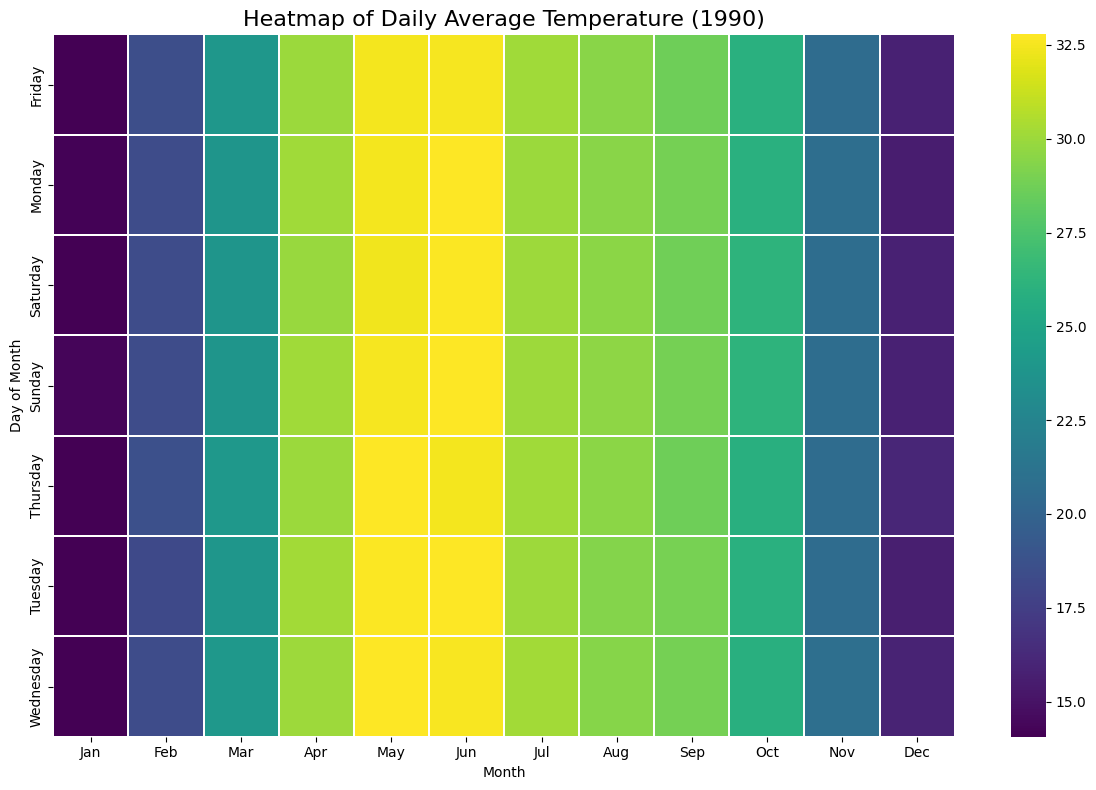

In [34]:
# Pivot the data to create a matrix of days vs. months
pivot_table = df_cleaned.pivot_table(values='tavg', index='day_name', columns='month')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', linecolor='white', linewidths=0.1)

plt.title('Heatmap of Daily Average Temperature (1990)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Day of Month')
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(12) + 0.5, labels=month_labels)
plt.tight_layout()
plt.show()

In [35]:
df_cleaned.head()

,time,tavg,tmin,tmax,prcp,prcp_log,temp_range,tavg_lag_1,month,day_of_year,day_of_week,year,day_name
0,1990-01-01,7.2,-3.7,18.1,0.0,0.0,21.8,NaN,1,1,0,1990,Monday
1,1990-01-02,10.5,3.8,17.2,0.0,0.0,13.4,7.2,1,2,1,1990,Tuesday
2,1990-01-03,10.2,1.8,18.6,0.0,0.0,16.8,10.5,1,3,2,1990,Wednesday
3,1990-01-04,9.1,-1.1,19.3,0.0,0.0,20.4,10.2,1,4,3,1990,Thursday
4,1990-01-05,13.5,3.2,23.8,0.0,0.0,20.6,9.1,1,5,4,1990,Friday


In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Advanced Feature Engineering ---

# Create lag features (temperature from 2 and 3 days ago)
df_cleaned['tavg_lag_2'] = df_cleaned['tavg'].shift(2)
df_cleaned['tavg_lag_3'] = df_cleaned['tavg'].shift(3)

# Create rolling window features (7-day rolling mean and standard deviation)
df_cleaned['tavg_7_day_mean'] = df_cleaned['tavg'].rolling(window=7).mean()
df_cleaned['tavg_7_day_std'] = df_cleaned['tavg'].rolling(window=7).std()

# Create cyclical features for day of the year
df_cleaned['day_sin'] = np.sin(2 * np.pi * df_cleaned['day_of_year'] / 365.25)
df_cleaned['day_cos'] = np.cos(2 * np.pi * df_cleaned['day_of_year'] / 365.25)

# Drop rows with NaN values created by lags and rolling windows
df_engineered = df_cleaned.dropna()

In [37]:
# Data Splitting (Chronological)

# Define features (X) and target (y)
# Note: We include the new engineered features
features = [
    'tmax', 'tmin', 'prcp', 'tavg_lag_1', 'tavg_lag_2', 'tavg_lag_3',
    'tavg_7_day_mean', 'tavg_7_day_std', 'day_sin', 'day_cos'
]
target = 'tavg'

X = df_engineered[features]
y = df_engineered[target]

# Split data chronologically to prevent data leakage
# Here, we'll use the last 20% of the data for testing
test_size = int(len(df_engineered) * 0.2)
X_train = X[:-test_size]
y_train = y[:-test_size]
X_test = X[-test_size:]
y_test = y[-test_size:]

In [41]:
# Model Training (XGBoost)
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Check XGBoost version
print(f"XGBoost version: {xgb.__version__}")

# Method 1: Simple training without early stopping (most compatible)
print("Training XGBoost model...")

xgb_model = xgb.XGBRegressor(
    n_estimators=500,  # Reduced from 1000 to prevent overfitting
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Simple fit without early stopping
xgb_model.fit(X_train, y_train)

print("Model training completed!")

XGBoost version: 2.1.4
Training XGBoost model...
Model training completed!


In [43]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

# Calculate various metrics
# For older sklearn versions, calculate RMSE manually
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print results
print("\n=== Model Performance ===")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE:  {test_rmse:.4f}")
print(f"Training MAE:  {train_mae:.4f}")
print(f"Testing MAE:   {test_mae:.4f}")
print(f"Training R²:   {train_r2:.4f} ({train_r2*100:.2f}% accuracy)")
print(f"Testing R²:    {test_r2:.4f} ({test_r2*100:.2f}% accuracy)")

# Additional analysis
print(f"\nOverfitting check:")
print(f"RMSE difference: {abs(train_rmse - test_rmse):.4f}")
print(f"R² difference:   {abs(train_r2 - test_r2):.4f}")

if abs(train_r2 - test_r2) > 0.1:
    print("⚠️  Possible overfitting detected (R² difference > 0.1)")
elif test_r2 > 0.8:
    print("✅ Excellent model performance!")
elif test_r2 > 0.6:
    print("✅ Good model performance")
else:
    print("⚠️  Model performance could be improved")


=== Model Performance ===
Training RMSE: 0.5830
Testing RMSE:  0.9180
Training MAE:  0.4248
Testing MAE:   0.6550
Training R²:   0.9923 (99.23% accuracy)
Testing R²:    0.9821 (98.21% accuracy)

Overfitting check:
RMSE difference: 0.3351
R² difference:   0.0102
✅ Excellent model performance!
